<h1 style="text-align:center">Forced Pendulum</h1>
<h3 style="text-align:center">MCHE485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

In this notebook, we'll be looking at the simple forced pendulum shown in Figure 1. It has a point mass, $m$, suspended on an inflexible, inextensible, massless rod of length $l$ from a perfect pin joint. There is a pure torque, $T$, acting about that joint.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/Pendulum_PureTorque.png" alt="Pendulum with Torque Input" width=15%><br>
    <strong>Figure 1: Pendulum with Torque Input</strong>
</p>

The equation of motion for this system is:

$ \quad m l^2 \ddot{\theta} + m g l \sin{\theta} = T $

This can be rewritten as:

$ \quad \ddot{\theta} = - \frac{g}{l} \sin{\theta} + \frac{T}{m l^2} $

To simulate the system, we need to write this 2nd-order differential equation as a system of first order differential equations.

To do so, define the state vector $\bar{w} = \left[\theta \ \dot{\theta}\right]^T$. We can also define an input vector as  $\bar{u} = \left[T \right]$. Since we only have one input to this system, the input vector only has one element.

Then, the system of first-order ODEs we have to solve is:

$ \quad \dot{\bar{w}} = g(\bar{w}, \bar{u}, t) $

Writing these out, we have:

$ \quad \dot{\bar{w}}  = \left[\dot{\theta} \right.$

$\phantom{\quad \dot{\bar{w}}  = \left[\right.}\left. - \frac{g}{l} \sin{\theta} + \frac{T}{m l^2}\right] $

Now, we can use that system of 1st-order differential equations to simulate the system.

To begin we will import the NumPy library, the matplotlib plotting library, and the ```odeint``` ODE solver from the SciPy library.

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
%matplotlib inline

# Import the plotting functions 
import matplotlib.pyplot as plt

In [3]:
# Import the ODE solver
from scipy.integrate import odeint

We need to define two functions for the differential equation solver to use. The first is just the system of differential equations to solve. I've defined it below by ```eq_of_motion()```. It is just the system of equations we wrote above. The second is the input force as a function of time. I have called it ```torque()``` below. Here, it is just a pulse input in torque, lasting 0.5 seconds.

In [4]:
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the forced pendulum system

    Arguments:
        w :  vector of the state variables:
        t :  time
        p :  vector of the parameters:
    """
    theta, theta_dot = w
    g, l, StartTime, T_amp = p

    # Create sysODE = (theta', theta_dot')
    sysODE = [theta_dot,
              -g/l * np.sin(theta) + torque(t, p) / (m * l**2)]
    return sysODE


def torque(t, p):
    """
    defines the torque input to the system
    """
    g, l, StartTime, T_amp = p
    
    # Select one of the two inputs below
    # Be sure to comment out the one you're not using
    
    # Input Option 1: 
    #    Just a step in force beginning at t=DistStart
    # f = F_amp * (t >= DistStart)
    
    # Input Option 2:
    #    A pulse in force beginning at t=StartTime and ending at t=(StartTime + 0.5)
    f = T_amp * (t >= StartTime) * (t <= StartTime + 0.5)
    
    return f

In [5]:
# Define the system parameters
m = 1.0             # mass (kg)
g = 9.81            # acceleration of gravity (m/s^2)
l = 1.0             # length of the pendulum (m)

In [6]:
# Set up simulation parameters

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

# Initial conditions
theta_init = 0.0                        # initial position
theta_dot_init = 0.0                    # initial velocity

# Set up the parameters for the input function
StartTime = 0.5              # Time the f(t) input will begin
T_amp = 2.0                # Amplitude of Disturbance force (N)

# Pack the parameters and initial conditions into arrays 
p = [g, l, StartTime, T_amp]
x0 = [theta_init, theta_dot_init]

Now, we will actually call the ode solver, using the ```odeint()``` function from the SciPy library. For more information on ```odeint```, see [the SciPy documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

In [7]:
# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

The solver returns the time history of each state. To plot an individual response, we just simply pick the corresponding column. Below, we'll plot the position of the mass as a function of time.

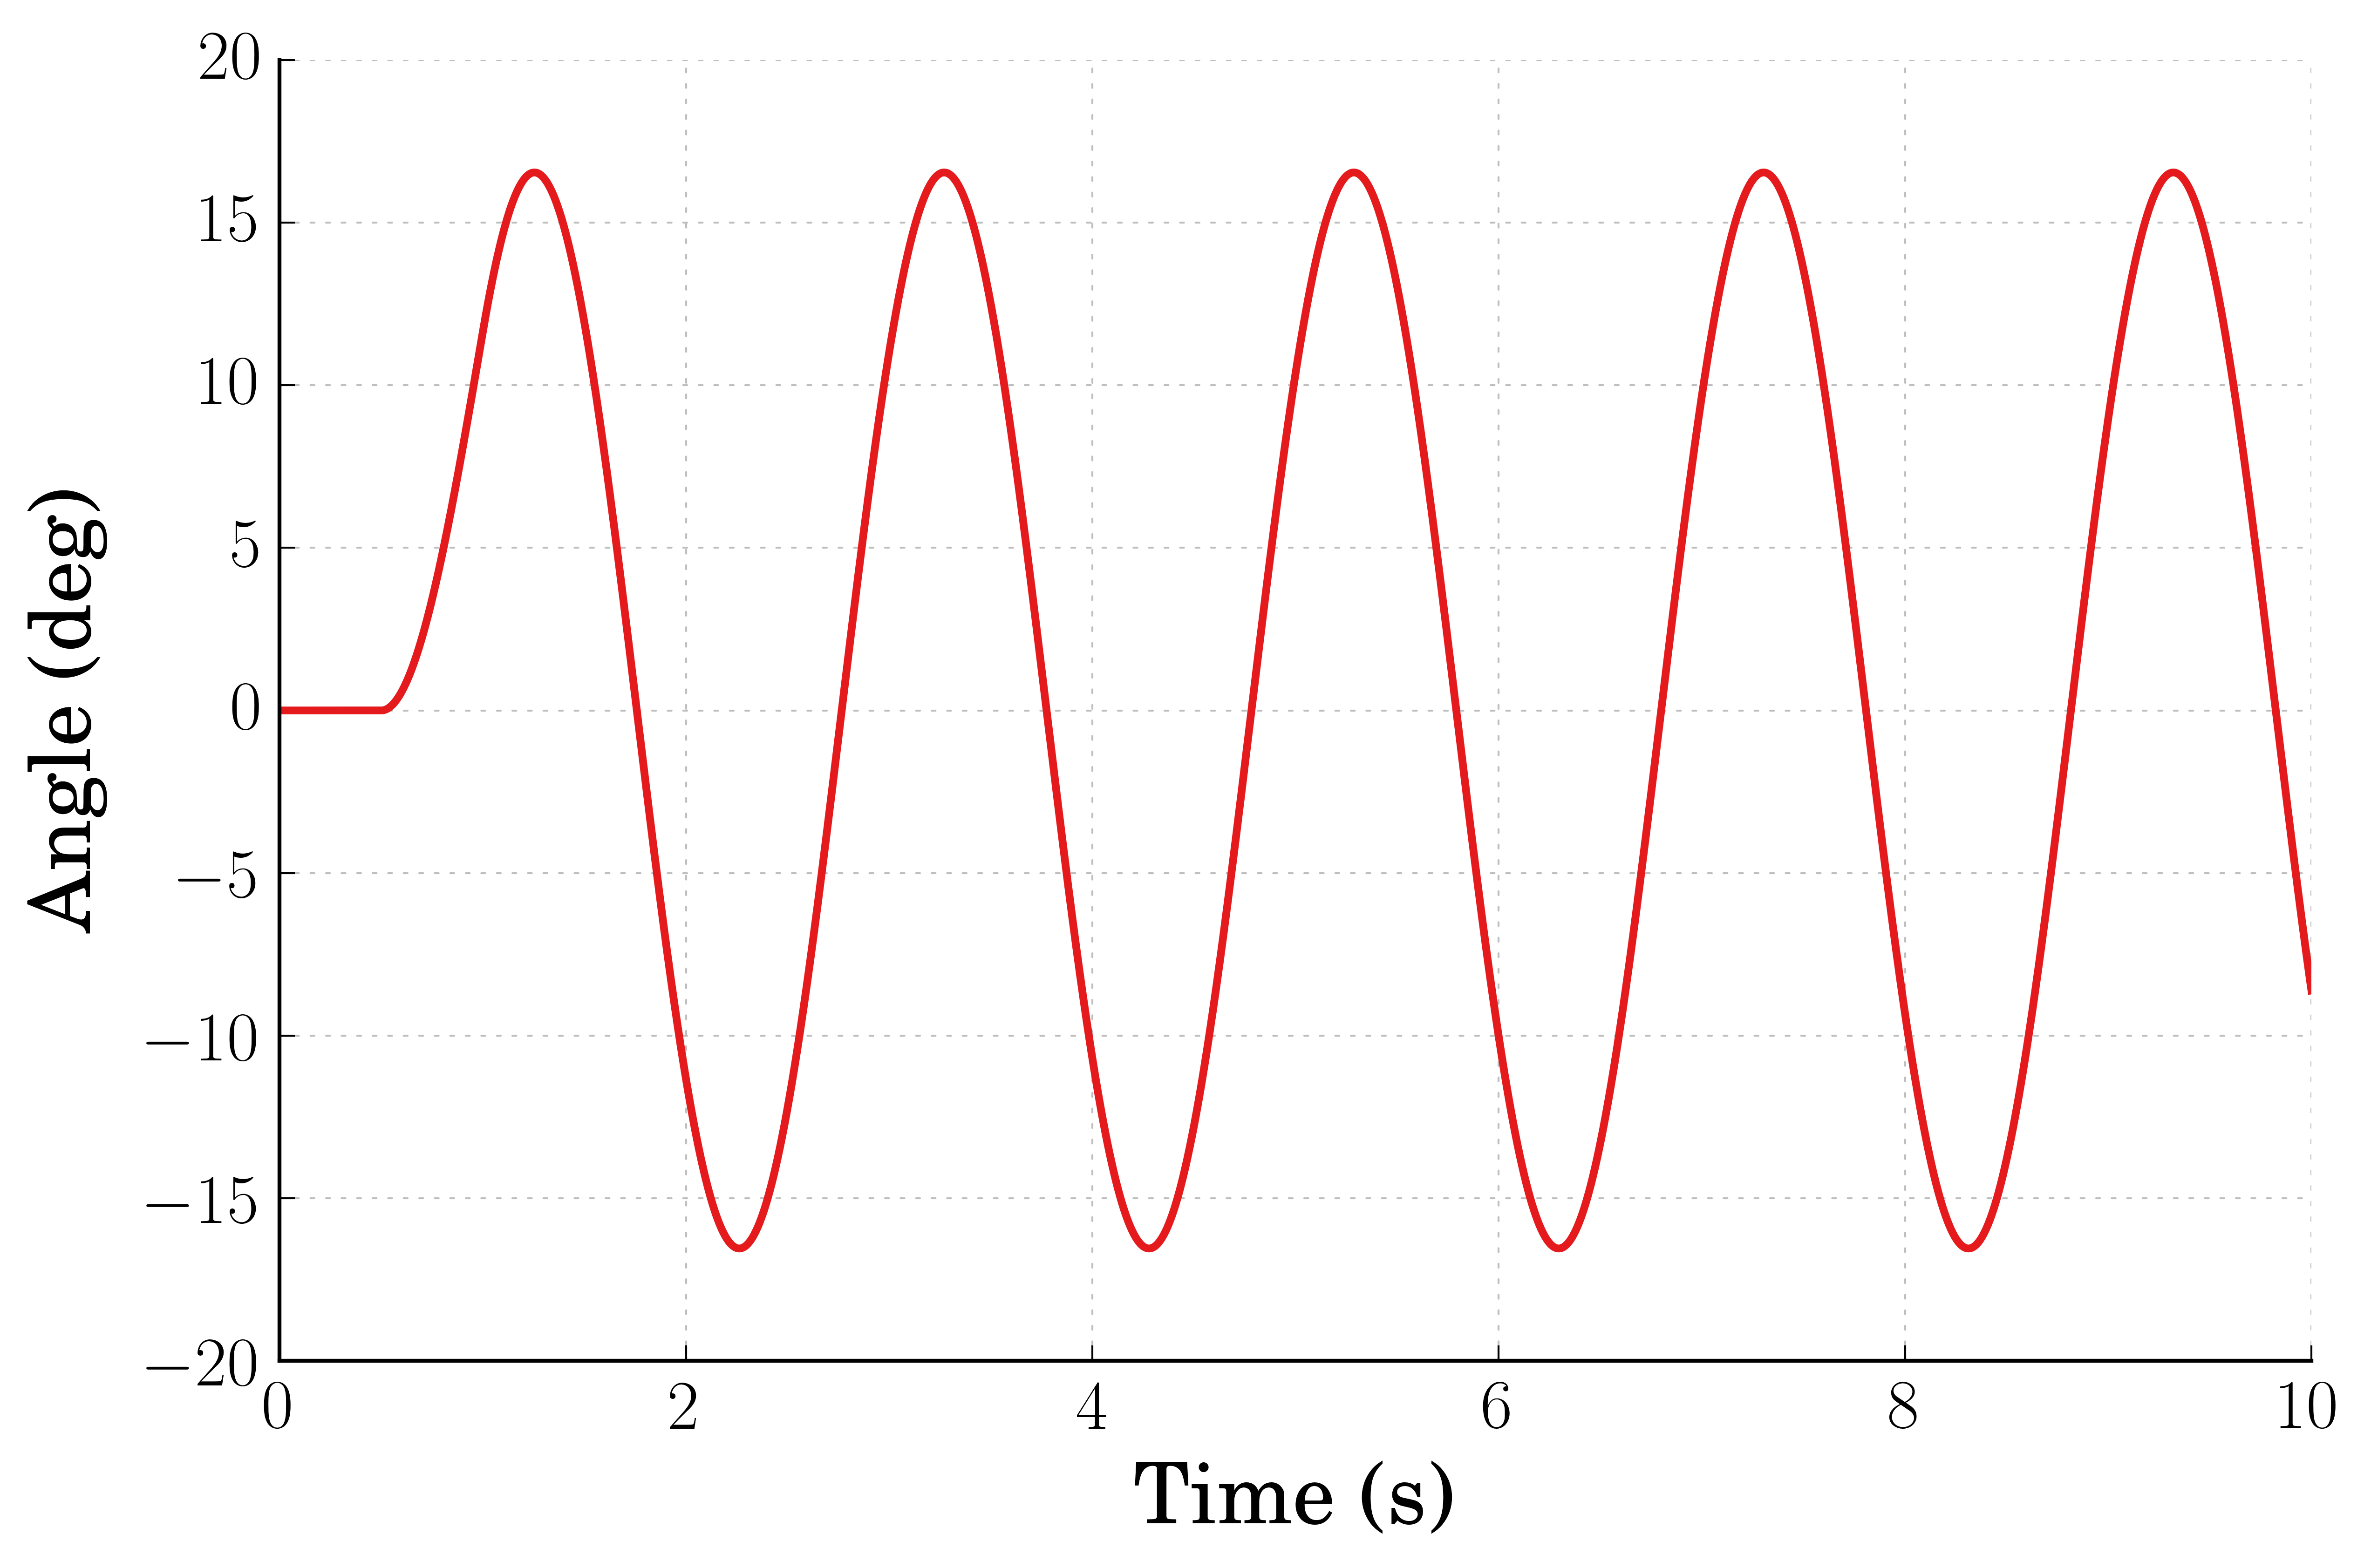

In [8]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Angle (deg)', family='serif', fontsize=22, weight='bold', labelpad=10)

# Plot the first element of resp for all time. It corresponds to the position.
plt.plot(t, resp[:,0] * 180/np.pi, linewidth=2, linestyle = '-', label=r'Response')

# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(0,10)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_DirectTorquePendulum_nonlinear.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

## Linerized Version
We can also linearize these equations and simluation the linearized system. To do so, we'll assume small angles about an equilibrium angle of $\theta_{eq} = 0$. The linearized equation of motion is then:

$ \quad m l^2 \ddot{\theta} + m g l \theta = T $

This can be rewritten as:

$ \quad \ddot{\theta} = - \frac{g}{l} \theta + \frac{T}{m l^2} $

Like the nonlinear version, to simulate the system, we need to write this 2nd-order differential equation as a system of first order differential equations.

To do so, we'll use the same state vector as before, $\bar{w} = \left[\theta \ \dot{\theta}\right]^T$. Also as before, we will an input vector as  $\bar{u} = \left[T \right]$. 

Writing these out, we have:

$ \quad \dot{\bar{w}}  = \left[\dot{\theta} \right.$

$\phantom{\quad \dot{\bar{w}}  = \left[\right.}\left. - \frac{g}{l} \theta + \frac{T}{m l^2}\right] $

We again need to define the function representing these equations that the differential equation solver calls. I've defined it below by ```eq_of_motion_linearized()```. The torque function we defined above is reused in this system.

In [9]:
def eq_of_motion_linearized(w, t, p):
    """
    Defines the linearized differential equations for the forced pendulum system

    Arguments:
        w :  vector of the state variables:
        t :  time
        p :  vector of the parameters:
    """
    theta, theta_dot = w
    g, l, StartTime, T_amp = p

    # Create sysODE = (theta', theta_dot')
    sysODE = [theta_dot,
              -g/l * theta + torque(t, p) / (m * l**2)]
    return sysODE

We'll use all the same simulation parameters from the earlier nonlinear simluation, so we do not need to define them again. So, we're ready to call the ODE solver.

In [10]:
# Call the ODE solver.
resp_linearized = odeint(eq_of_motion_linearized, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

Now, let's plot the nonlinear and linearized responses together, for comparision.

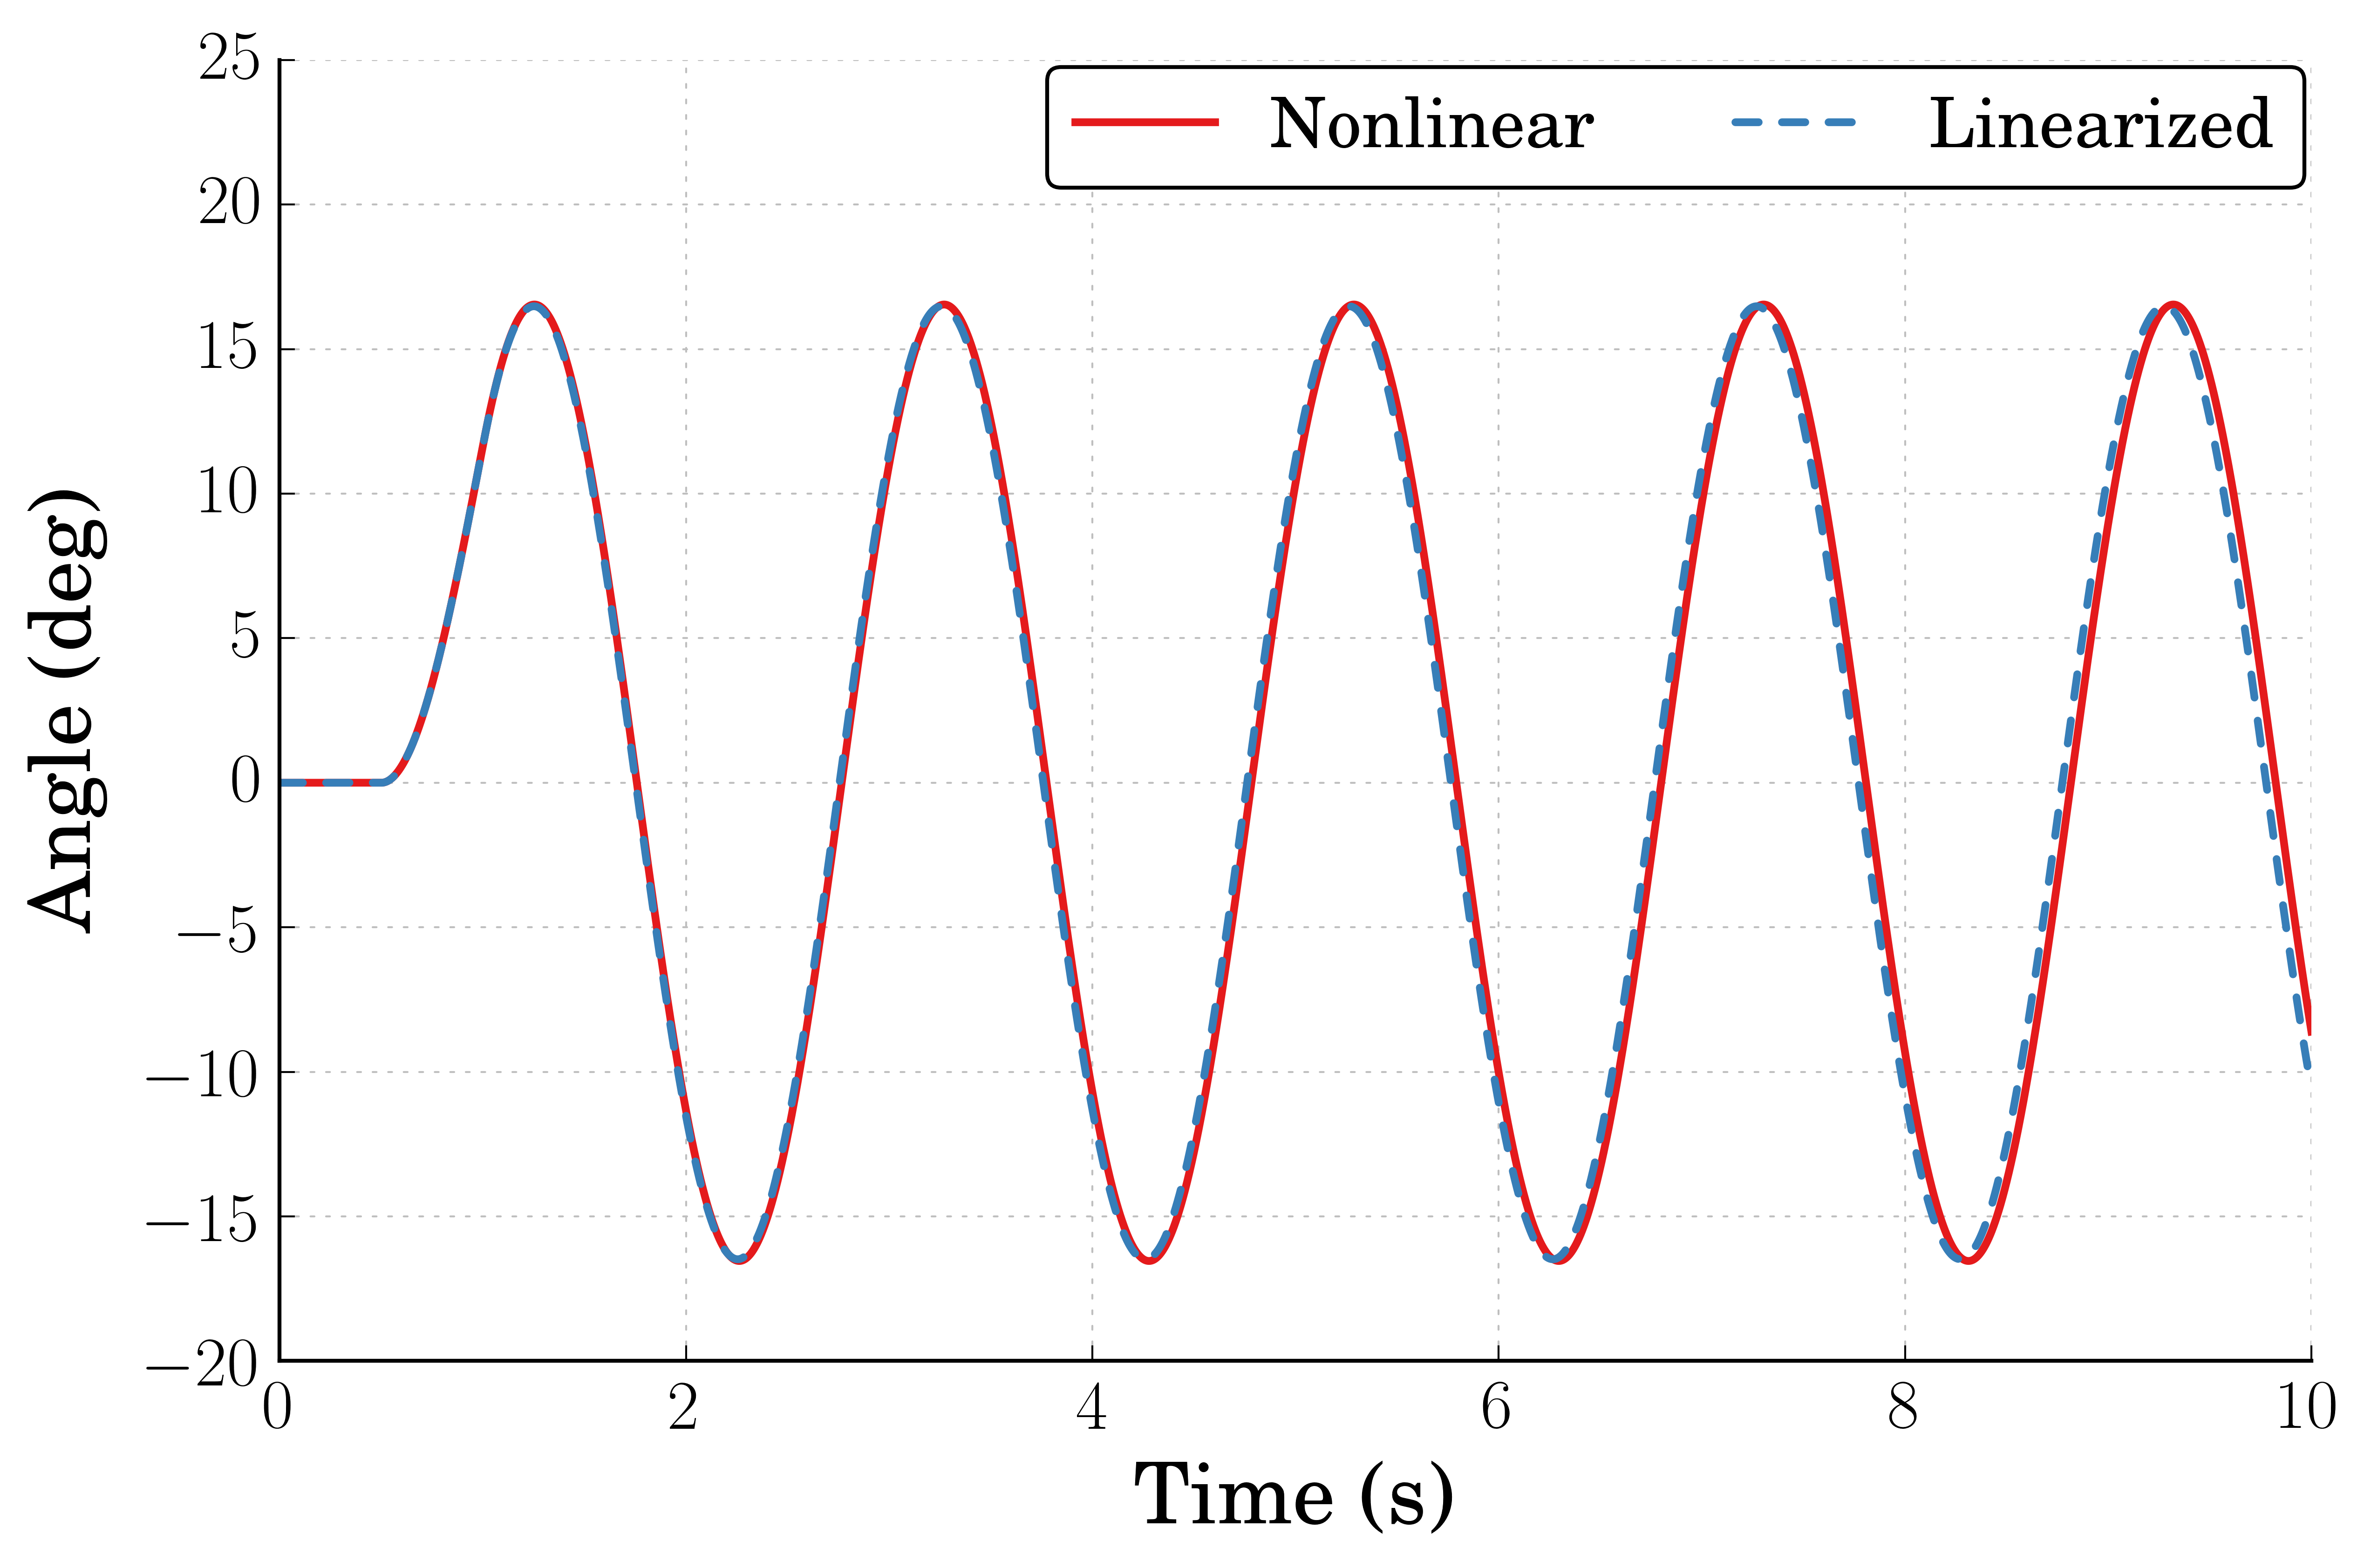

In [11]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Angle (deg)', family='serif', fontsize=22, weight='bold', labelpad=10)

# Plot the first element of resp for all time. It corresponds to the position.
plt.plot(t, resp[:,0] * 180/np.pi, linewidth=2, linestyle = '-', label=r'Nonlinear')
plt.plot(t, resp_linearized[:,0] * 180/np.pi, linewidth=2, linestyle = '--', label=r'Linearized')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-20,25)

# # Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_DirectTorquePendulum_Linearized.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

For the small value of toruqe that we chose, which results in small angles of oscillation, the linearized approximation of the system fairly closely matches the full, nonlinear version. If the system were oscillating over a larger range of angles, then the linearized version would be a poorer approximation.

To test this, increase the value of ```T_max``` above (in line 6, if you've run all the cells in order) and re-run the comparison. There will be a greater difference between the responses of the full nonlinear and linearized systems.

<hr class = "style-end">


#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [12]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
import codecs
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(codecs.open(css_file, 'r', 'utf-8').read())